# SESSION 6 SHP - MODELING DISTRIBUTIONS & PDF

## 1. Hubungkan Google Drive dan Google Colab

ChatGPT Prompt:

Berikan saya code python untuk mengimpor module google drive dan mount google drive saya pada google colab

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2. Load Dataset

ChatGPT Prompt:

Beri kode untuk membaca dataset "predictive_maintenance.csv" disimpan dengan nama dataframe 'data', sesuaikan path filenya

In [3]:
import pandas as pd

# Sesuaikan path file CSV dengan lokasi file Anda
path_to_csv = '/content/drive/My Drive/path/to/predictive_maintenance.csv'

# Membaca file CSV dan menyimpannya dalam DataFrame 'data'
data = pd.read_csv(path_to_csv)

# Menampilkan beberapa baris pertama dari DataFrame 'data' untuk memastikan bahwa file telah terbaca dengan benar
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## 3. Modeling Distributions

## 3.1. Distribusi Eksponensial

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi distribusi eksponensial untuk kolom "Torque [Nm]" pada data untuk mengetahui apakah kolom tersebut mengikuti distribusi eksponensial

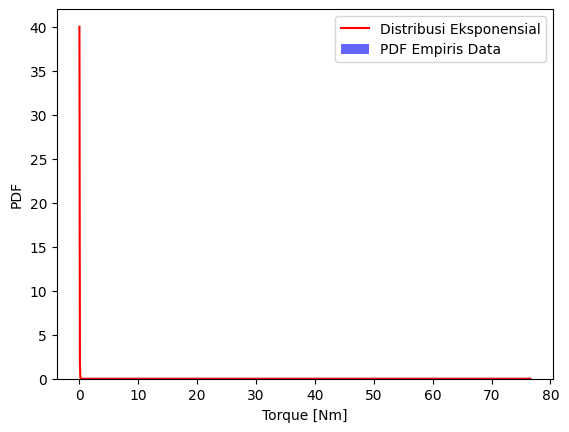

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Hitung parameter distribusi eksponensial (skala) berdasarkan data
scale_parameter = 1 / torque_data.mean()

# Buat distribusi eksponensial
exponential_dist = expon(scale=scale_parameter)

# Hitung PDF (Probability Density Function) dari distribusi eksponensial
x = np.linspace(0, torque_data.max(), 1000)
pdf = exponential_dist.pdf(x)

# Hitung PDF empiris dari data
hist, bin_edges = np.histogram(torque_data, bins=100, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot distribusi eksponensial dan PDF empiris data
plt.plot(x, pdf, label='Distribusi Eksponensial', color='red')
plt.hist(torque_data, bins=100, density=True, alpha=0.6, label='PDF Empiris Data', color='blue')
plt.legend()
plt.xlabel('Torque [Nm]')
plt.ylabel('PDF')
plt.show()


## 3.2. Distribusi Normal

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi distribusi  normal untuk kolom "Torque [Nm]" pada data dalam konteks modeling distributions, kemudian plot grafik dan print nilai estimasi parameter distribusi normal (mean dan std) dari data

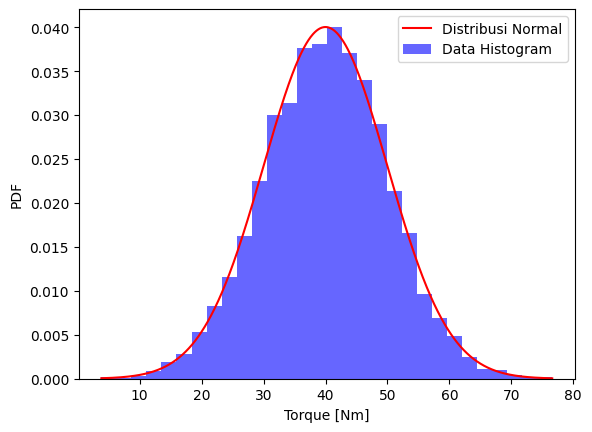

Estimasi Mean: 39.986909999999995
Estimasi Std: 9.96843526597329


In [21]:

from scipy.stats import norm

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Hitung estimasi rata-rata dan deviasi standar
mean = np.mean(torque_data)
std = np.std(torque_data)

# Buat distribusi normal
normal_dist = norm(loc=mean, scale=std)

# Hitung PDF (Probability Density Function) dari distribusi normal
x = np.linspace(torque_data.min(), torque_data.max(), 1000)
pdf = normal_dist.pdf(x)

# Plot distribusi normal dan data histogram
plt.plot(x, pdf, label='Distribusi Normal', color='red')
plt.hist(torque_data, bins=30, density=True, alpha=0.6, label='Data Histogram', color='blue')
plt.legend()
plt.xlabel('Torque [Nm]')
plt.ylabel('PDF')
plt.show()

# Print estimasi parameter distribusi normal
print(f"Estimasi Mean: {mean}")
print(f"Estimasi Std: {std}")

ChatGPT Prompt:

Berikan code untuk uji normalitas dan print hasil ujinya (mis. p_value)

In [23]:
import pandas as pd
from scipy.stats import shapiro

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Uji normalitas dengan uji Shapiro-Wilk
statistic, p_value = shapiro(torque_data)

# Cetak hasil uji normalitas
print(f"Uji Shapiro-Wilk:")
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpretasi hasil uji normalitas
alpha = 0.05
if p_value > alpha:
    print("Data mengikuti distribusi normal (tidak dapat menolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (menolak H0)")


Uji Shapiro-Wilk:
Statistic: 0.9997695088386536
P-Value: 0.356086790561676
Data mengikuti distribusi normal (tidak dapat menolak H0)


## 3.3. Normal Probability Plot

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi normal probability plot untuk kolom "Torque [Nm]" pada data dalam konteks modeling distributions dan berikan penjelasan untuk menginterpretasikan hasilnya

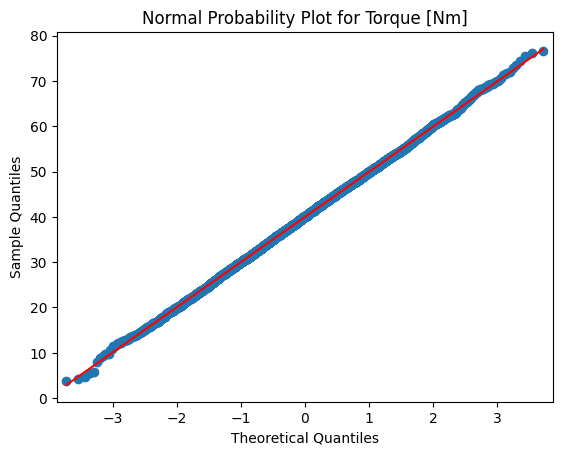

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Buat Q-Q plot
sm.qqplot(torque_data, line='s')
plt.title('Normal Probability Plot for Torque [Nm]')
plt.show()


# 4. PDF (Probability Density Function)

## 4.1. KDE dengan berbagai Fungsi Kernel berbeda

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi Kernel Density Estimaation dalam 1 grafik dengan berbagai fungsi kernel berbeda untuk kolom "Torque [Nm]" pada data dalam konteks probability density function. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya


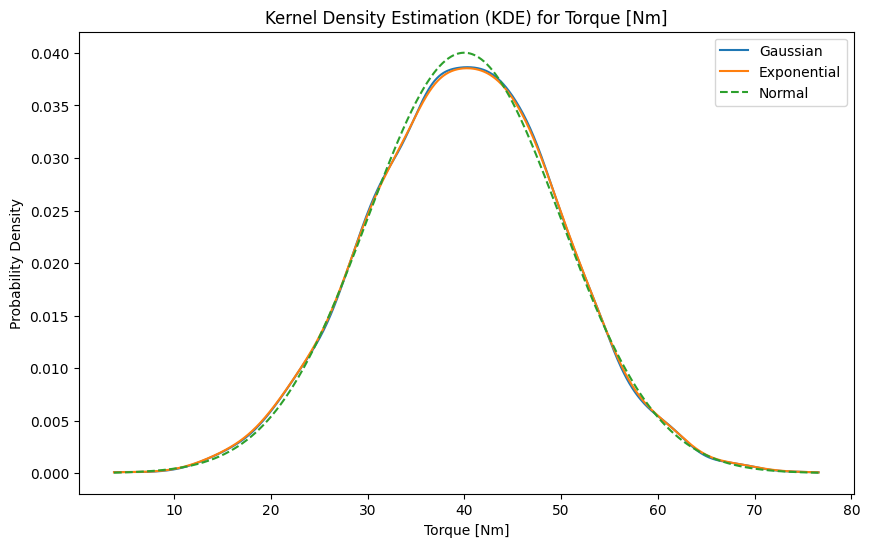

In [26]:
from scipy.stats import norm, gaussian_kde, expon

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Membuat array untuk nilai yang akan diplot
x = np.linspace(torque_data.min(), torque_data.max(), 1000)

# Fungsi kernel yang berbeda
kernels = [
    ('Gaussian', 'silverman'),  # Gunakan 'silverman' untuk bandwidth yang optimal
    ('Exponential', 0.2),  # Atur skalar bandwidth sesuai kebutuhan
]

# Membuat plot untuk setiap fungsi kernel
plt.figure(figsize=(10, 6))
for kernel_name, bw_method in kernels:
    kde = gaussian_kde(torque_data, bw_method=bw_method)
    pdf = kde(x)
    plt.plot(x, pdf, label=kernel_name)

# Menambahkan plot distribusi normal untuk perbandingan
pdf_normal = norm.pdf(x, loc=torque_data.mean(), scale=torque_data.std())
plt.plot(x, pdf_normal, label='Normal', linestyle='--')

plt.title('Kernel Density Estimation (KDE) for Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## 4.2. KDE dengan berbagai Bandwidth berbeda

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi Kernel Density Estimaation dalam 1 grafik dengan berbagai bandwidth berbeda untuk kolom "Torque [Nm]" pada data dalam konteks probability density function. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

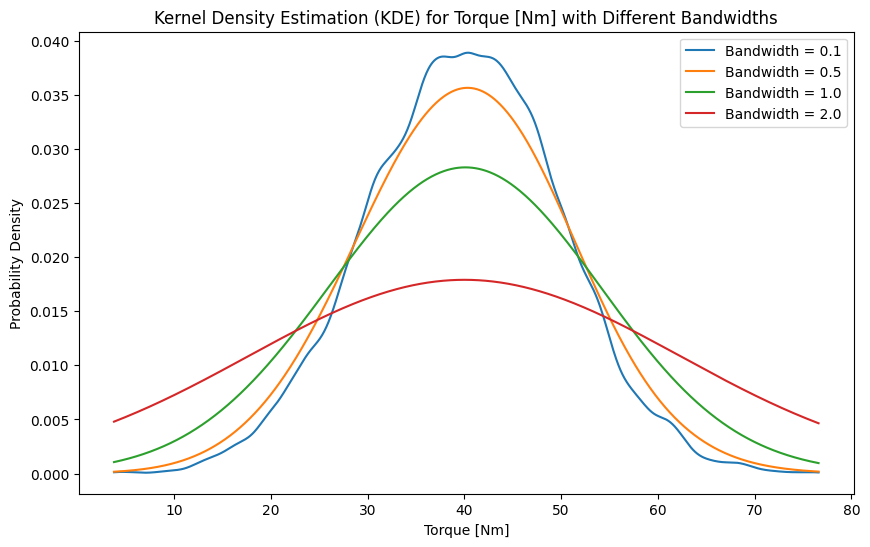

In [27]:
from scipy.stats import gaussian_kde

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Membuat array untuk nilai yang akan diplot
x = np.linspace(torque_data.min(), torque_data.max(), 1000)

# Bandwidth yang berbeda
bandwidths = [0.1, 0.5, 1.0, 2.0]

# Membuat plot untuk setiap nilai bandwidth
plt.figure(figsize=(10, 6))
for bw in bandwidths:
    kde = gaussian_kde(torque_data, bw_method=bw)
    pdf = kde(x)
    plt.plot(x, pdf, label=f'Bandwidth = {bw}')

plt.title('Kernel Density Estimation (KDE) for Torque [Nm] with Different Bandwidths')
plt.xlabel('Torque [Nm]')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## 4.3. Implementasi Histogram

ChatGPT Prompt:

Berikan kode python untuk mengimplementasikan histogram untuk probability density function pada kolom "Torque [Nm]" dalam data. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

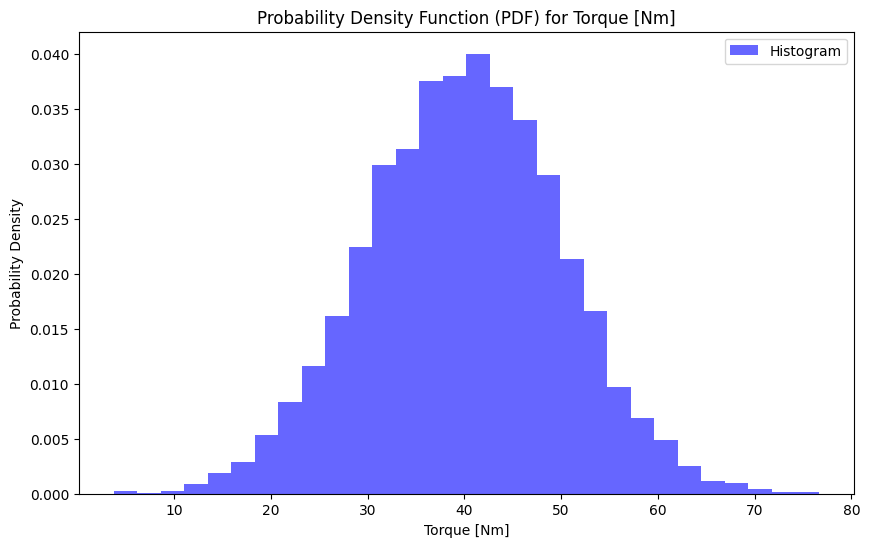

In [28]:
# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(torque_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')

plt.title('Probability Density Function (PDF) for Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## 4.4. Implementasi CDF

ChatGPT Prompt:

Berikan kode python untuk mengimplementasikan CDF untuk   probability density function pada  kolom "Torque [Nm]" dalam data. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

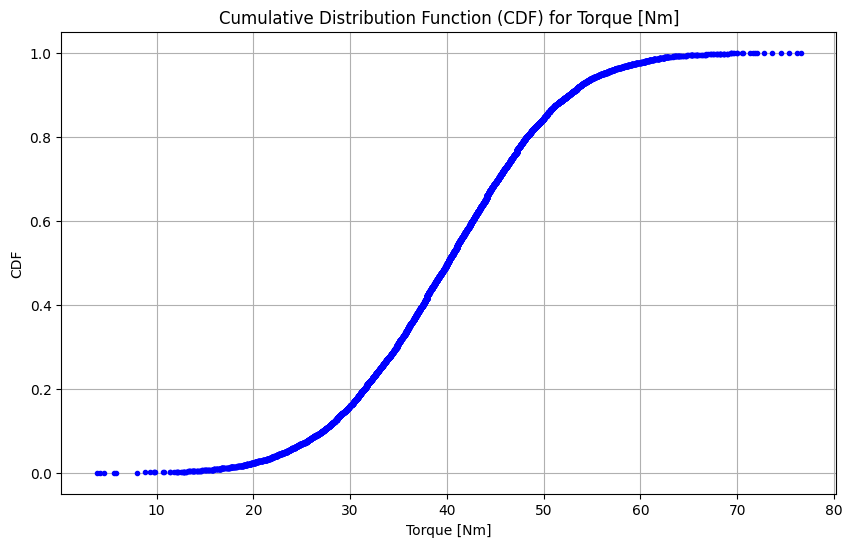

In [29]:

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Mengurutkan data
torque_data_sorted = np.sort(torque_data)

# Menghitung CDF
cdf = np.arange(1, len(torque_data_sorted) + 1) / len(torque_data_sorted)

# Membuat plot CDF
plt.figure(figsize=(10, 6))
plt.plot(torque_data_sorted, cdf, marker='.', linestyle='none', color='blue')
plt.title('Cumulative Distribution Function (CDF) for Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('CDF')
plt.grid(True)
plt.show()


## 4.5. Goodness of Fit Test

ChatGPT Prompt:

Berikan code python untuk menentukan distribusi yang cocok dengan kolom "Torque [Nm]" pada data dengan menggunakan uji:

Kolmogorov-Smirnov test​

Anderson-Darling Test​

Shapiro-Wilk Test​

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, anderson, shapiro, norm, expon

# Anggap Anda sudah memiliki dataframe 'data' dengan kolom 'Torque [Nm]'
# Contoh kode untuk membaca dataset dan menyimpannya dalam dataframe:
# data = pd.read_csv("nama_file.csv")

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Fungsi uji distribusi eksponensial
def test_exponential(data):
    result = {}
    kstest_stat, kstest_pvalue = kstest(data, expon.cdf)
    anderson_stat, anderson_critical_values, _ = anderson(data, dist='expon')
    shapiro_stat, shapiro_pvalue = shapiro(data)

    result['Kolmogorov-Smirnov (Exponential)'] = (kstest_stat, kstest_pvalue)
    result['Anderson-Darling (Exponential)'] = (anderson_stat, anderson_critical_values)
    result['Shapiro-Wilk'] = (shapiro_stat, shapiro_pvalue)

    return result

# Fungsi uji distribusi normal
def test_normal(data):
    result = {}
    kstest_stat, kstest_pvalue = kstest(data, norm.cdf)
    anderson_stat, anderson_critical_values, _ = anderson(data, dist='norm')
    shapiro_stat, shapiro_pvalue = shapiro(data)

    result['Kolmogorov-Smirnov (Normal)'] = (kstest_stat, kstest_pvalue)
    result['Anderson-Darling (Normal)'] = (anderson_stat, anderson_critical_values)
    result['Shapiro-Wilk'] = (shapiro_stat, shapiro_pvalue)

    return result

# Lakukan uji distribusi eksponensial
result_exponential = test_exponential(torque_data)

# Lakukan uji distribusi normal
result_normal = test_normal(torque_data)

# Cetak hasil uji distribusi
print("Hasil Uji Distribusi (Exponential):")
for test_name, (test_stat, test_pvalue) in result_exponential.items():
    print(f"{test_name}: Statistik = {test_stat}, P-Value = {test_pvalue}")

print("\nHasil Uji Distribusi (Normal):")
for test_name, (test_stat, test_pvalue) in result_normal.items():
    print(f"{test_name}: Statistik = {test_stat}, P-Value = {test_pvalue}")


Hasil Uji Distribusi (Exponential):
Kolmogorov-Smirnov (Exponential): Statistik = 0.9992492669249045, P-Value = 0.0
Anderson-Darling (Exponential): Statistik = 2595.119807446583, P-Value = [0.922 1.078 1.341 1.606 1.957]
Shapiro-Wilk: Statistik = 0.9997695088386536, P-Value = 0.356086790561676

Hasil Uji Distribusi (Normal):
Kolmogorov-Smirnov (Normal): Statistik = 0.9999276519560749, P-Value = 0.0
Anderson-Darling (Normal): Statistik = 0.5908920754191058, P-Value = [0.576 0.656 0.787 0.918 1.092]
Shapiro-Wilk: Statistik = 0.9997695088386536, P-Value = 0.356086790561676


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 4.6. Moment (Skewness, Kurtosis)

ChatGPT Prompt:

Berikan code untuk menghitung momen untuk kolom "Torque [Nm]" dari data

In [31]:

# Ambil data dari kolom 'Torque [Nm]'
torque_data = data['Torque [Nm]']

# Menghitung momen pertama (mean)
mean_moment = np.mean(torque_data)

# Menghitung momen kedua (varians)
variance_moment = np.var(torque_data)

# Menghitung momen ketiga (skewness)
skewness_moment = np.mean((torque_data - mean_moment) ** 3) / np.power(variance_moment, 3 / 2)

# Menghitung momen keempat (kurtosis)
kurtosis_moment = np.mean((torque_data - mean_moment) ** 4) / np.power(variance_moment, 2)

# Cetak hasil momen
print(f"Momen Pertama (Mean): {mean_moment}")
print(f"Momen Kedua (Varians): {variance_moment}")
print(f"Momen Ketiga (Skewness): {skewness_moment}")
print(f"Momen Keempat (Kurtosis): {kurtosis_moment}")


Momen Pertama (Mean): 39.986909999999995
Momen Kedua (Varians): 99.36970165189999
Momen Ketiga (Skewness): -0.009515168291199659
Momen Keempat (Kurtosis): 2.9861660653572106
